In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.data import read_merged
from seminartools.data import read_inflation

# 1. Read data

In [19]:
#only european countries, excluding spain and portugal
df = read_merged().reset_index()

#all countries
# df = read_merged().reset_index

In [20]:
df.pivot(index="date", columns="country", values="inflation")

country,Australia,Belgium,Canada,Denmark,France,Germany,Italy,Japan,Korea,Netherlands,New Zealand,Norway,Portugal,South Africa,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
date,,,,,,,,,,,,,,,,,,,,
1977-01-01,NaN,NaN,0.023904,NaN,NaN,NaN,NaN,0.022951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017231
1977-04-01,NaN,NaN,0.023346,NaN,NaN,NaN,NaN,0.027244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022022
1977-07-01,NaN,NaN,0.022814,NaN,NaN,NaN,NaN,0.003120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014364
1977-10-01,NaN,NaN,0.018587,NaN,NaN,NaN,NaN,0.010886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010893
1978-01-01,NaN,NaN,0.021898,NaN,NaN,NaN,NaN,0.004615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.021295,0.033275,0.020211,0.021536,0.014870,0.018498,0.030160,0.006876,0.015388,0.029173,0.017820,0.007055,0.015094,0.014892,0.020852,0.016158,0.007859,NaN,NaN,0.022835
2022-04-01,0.017376,0.016949,0.031008,0.032997,0.022894,0.028500,0.018298,0.009756,0.020818,0.024764,0.016643,0.024113,0.050186,0.023478,0.032860,0.032686,0.015595,NaN,NaN,0.029738
2022-07-01,0.017933,0.025000,0.008354,0.023957,0.011638,0.016134,0.021563,0.010628,0.011352,0.040519,0.021527,0.022995,0.010619,0.027957,0.012038,0.030796,0.006718,NaN,NaN,0.013147


# 2. AR model per country

In [21]:
model = FourQuarterAverageModel()
model

In [22]:
from warnings import filterwarnings

filterwarnings("ignore")
model.fit(df)

# 4. H-period ahead forecasting

In [23]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df, "2020-01-01", h=1)
forecast

,date,country,inflation
0,2020-01-01,Australia,0.004455
1,2020-01-01,Belgium,0.001163
2,2020-01-01,Canada,0.005183
3,2020-01-01,Denmark,0.001706
4,2020-01-01,France,0.002897
...,...,...,...
255,2023-01-01,Sweden,0.027675
256,2023-01-01,Switzerland,0.007345
257,2023-01-01,Türkiye,NaN
258,2023-01-01,United Kingdom,NaN


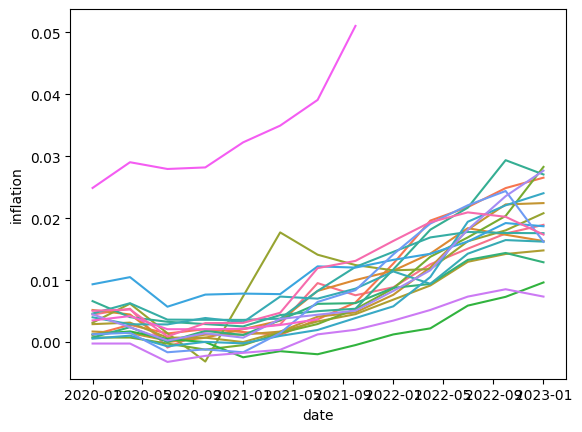

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=forecast, x="date", y="inflation", hue="country")
# turn off legend
plt.legend().remove()

In [25]:
df

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [10]:
forecast

,date,country,inflation
0,2020-01-01,Belgium,0.001163
1,2020-01-01,Denmark,0.001706
2,2020-01-01,France,0.002897
3,2020-01-01,Germany,0.003133
4,2020-01-01,Italy,0.000737
...,...,...,...
125,2023-01-01,Netherlands,0.027058
126,2023-01-01,Norway,0.016216
127,2023-01-01,Sweden,0.027675
128,2023-01-01,Switzerland,0.007345


In [11]:
forecast_merged = forecast.copy().rename(
    columns={"inflation": "pred"}
).merge(
    df[["country", "date", "inflation"]],
    on=["country", "date"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,date,country,pred,actual
30,2020-10-01,Belgium,0.002086,-0.000920
31,2020-10-01,Denmark,0.001212,-0.000964
32,2020-10-01,France,0.000717,-0.001907
33,2020-10-01,Germany,-0.003139,NaN
34,2020-10-01,Italy,-0.001210,-0.001947
...,...,...,...,...
125,2023-01-01,Netherlands,0.027058,-0.013667
126,2023-01-01,Norway,0.016216,0.006886
127,2023-01-01,Sweden,0.027675,0.014955
128,2023-01-01,Switzerland,0.007345,0.010084


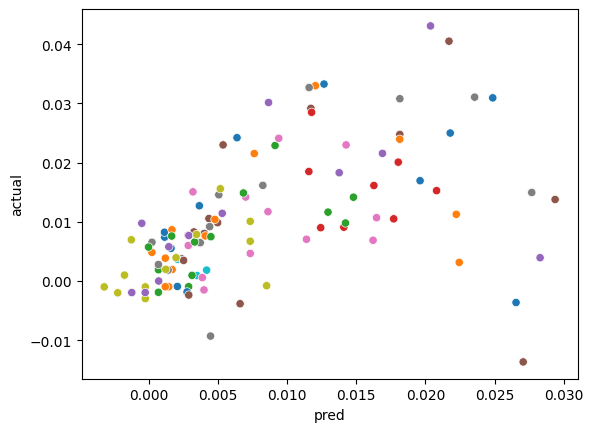

In [12]:
sns.scatterplot(data=forecast_merged, x="pred", y="actual", hue="country")
plt.legend().remove()

In [13]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"]), missing="drop"
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     37.02
Date:                Mon, 15 Apr 2024   Prob (F-statistic):           1.64e-08
Time:                        08:37:38   Log-Likelihood:                 374.65
No. Observations:                 115   AIC:                            -745.3
Df Residuals:                     113   BIC:                            -739.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.001      3.864      0.000       0.002       0.007
pred           0.6674      0.110      6.084      0.000       0.450       0.885
==============================================================================
Omnibus:                        8.944   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               18.834
Skew:                          -0.125   Prob(JB):                     8.13e-05
Kurtosis:                       4.967   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
tss

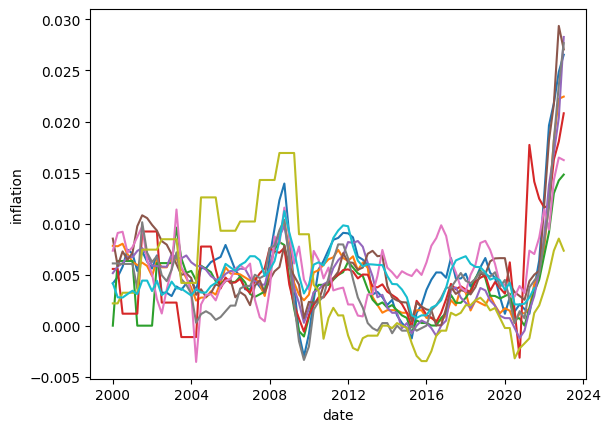

In [15]:
from seminartools.models.utils import make_oos_predictions

sns.lineplot(
    data = make_oos_predictions(lambda: model, df, tss),
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# ARMAX

In [16]:
from seminartools.models.armax_model import ARMAXModel
preds = make_oos_predictions(lambda: ARMAXModel(max_p = 2, max_q = 2), df, tss, progress = True, num_cores = 5)
preds

Splits:   0%|          | 0/5 [00:00<?, ?it/s]

Splits: 100%|██████████| 5/5 [00:00<00:00, 130.67it/s]
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive p

,date,country,inflation
0,2004-10-01,Italy,0.004525
1,2004-10-01,France,0.004513
2,2004-10-01,Sweden,0.006102
3,2004-10-01,Denmark,0.007383
4,2004-10-01,United Kingdom,0.104256
...,...,...,...
699,2020-10-01,United Kingdom,0.008986
700,2023-01-01,Germany,0.001353
701,2023-01-01,Netherlands,-0.001668
702,2023-01-01,Norway,-0.012972


In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# PCA VAR

In [ ]:
from seminartools.models.pca_var_model import PCAVARModel
preds = make_oos_predictions(lambda: PCAVARModel(), df, tss, progress = True, num_cores = 1)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# UCSVSS

In [ ]:
from seminartools.models.uc_sv_ss_model import UCSVSSModel

preds = make_oos_predictions(
    lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
    df,
    tss,
    progress=True,
    num_cores=1,
)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# RE model

In [ ]:
from seminartools.models.random_effects_model import RandomEffectsModel

preds = make_oos_predictions(
    lambda: RandomEffectsModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# Distance based model

In [ ]:
from seminartools.models.distance_model import DistanceModel

preds = make_oos_predictions(
    lambda: DistanceModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [ ]:
model = DistanceModel()
model.fit(df[df["date"] <= "2000-01-01"])
model

In [ ]:
pd.Series(model.country_intercepts.mean(axis = 0), index= model.countries.tolist() + ["mean"]).sort_values()

In [ ]:
df.query("country == 'South Africa'").set_index("date")["inflation"].plot()

In [ ]:
preds = h_period_ahead_forecast(model, df, "2000-01-01", h=1)
preds

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [ ]:
preds.query("inflation > 1")

In [ ]:
model._create_lagged_variables(df.set_index("date")).query("country == 'Spain' and date == '2020-04-01'").T

In [ ]:
import numpy as np
from scipy.stats import percentileofscore

feature_df = model._create_lagged_variables(df.set_index("date"))
# we calculate the quantiles for all float64 dtypes
cols = feature_df.select_dtypes("float64").columns
specific_feature_map = feature_df.query("country == 'Spain' and date == '2020-04-01'")

percentile_columns = pd.DataFrame(index=specific_feature_map.index)

# Calculating percentile ranks for each float column in 'specific_feature_map'.
for col in cols:
    # This will hold the percentile ranks for the current column.
    col_percentiles = []
    
    # Iterate through each row in 'specific_feature_map' to calculate the percentile rank of its value in 'feature_df'.
    for value in specific_feature_map[col]:
        percentile_rank = percentileofscore(feature_df[col].dropna(), value, kind='rank')
        col_percentiles.append(percentile_rank)
    
    # Assigning calculated percentile ranks to the new columns.
    percentile_columns[f'{col}'] = col_percentiles

percentile_columns["country"] = specific_feature_map["country"]

pd.concat([
    specific_feature_map,
    percentile_columns
], keys = ["feature_value", "percentile"]).T

In [ ]:
preds.query("country == 'Switzerland' and date == '2010-07-01'").T

# Get scores

In [26]:
from seminartools.models.utils import get_stats
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.models.pca_var_model import PCAVARModel
from seminartools.models.armax_model import ARMAXModel
from seminartools.models.uc_sv_ss_model import UCSVSSModel
from seminartools.models.random_effects_model import RandomEffectsModel
from seminartools.models.distance_model import DistanceModel
from seminartools.models.mucsvss_model import MUCSVSSModel

muc_model = MUCSVSSModel(num_particles=100008, stochastic_seasonality=True)
muc_model.load_from_disk("../../models/mucsvss_model_100008_deterministic_all.pkl")
muc_model

In [27]:
exog_columns = [
    "gdp_growth",
    "interest_rate",
    "unemployment_rate",
    "commodity_CRUDE_PETRO",
    "commodity_iNATGAS",
    "commodity_iAGRICULTURE",
    "commodity_iMETMIN",
    "commodity_iPRECIOUSMET",
]

stats = get_stats(
    [
        # ("4qa", lambda: FourQuarterAverageModel()),
        #  #("pca_var", lambda: PCAVARModel()),
        # ("ar", lambda: ARMAXModel(max_p=2, max_q=0)),
        # (
        #     "arx",
        #     lambda: ARMAXModel(max_p=2, max_q=0, exogenous_columns=exog_columns),
        # ),
        ("pca_var_2", lambda: PCAVARModel(num_pcs = 2)),
        ("pca_var_3", lambda: PCAVARModel()),
        ("pca_var_4", lambda: PCAVARModel(num_pcs = 4)),
        ("pca_var_5", lambda: PCAVARModel(num_pcs = 5)),
        ("pca_var_6", lambda: PCAVARModel(num_pcs = 6)),
        # ("arma", lambda: ARMAXModel(max_p=2, max_q=2)),
        # (
        #     "armax",
        #     lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns=exog_columns),
        # ),
        # (
        #     "uc_sv",
        #     lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=False),
        # ),
        # (
        #     "uc_sv_ss",
        #     lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
        # ),
        # ("random_effects", lambda: RandomEffectsModel()),
        # (
        #     "random_effects_x",
        #     lambda: RandomEffectsModel(exogenous_columns=exog_columns),
        # ),
        # ("distance", lambda: DistanceModel()),
        # ("distance_x", lambda: DistanceModel(exogenous_columns=exog_columns)),
        # ("mucsvss", lambda: muc_model),
       
    ],
    df,
    tss,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
)
stats

,mse,mae,r2,mz_intercept,mz_slope,mz_r2,mz_wald_test_statistic,p-value
pca_var_4,0.000058,0.005594,0.143108,0.002827,0.643727,0.228551,93.145964,4.311561216025498e-39
pca_var_5,0.000062,0.005771,0.090252,0.003121,0.579939,0.219248,138.950364,1.4151491763097785e-56
pca_var_3,0.000065,0.005812,0.050776,0.003356,0.609696,0.150508,98.735352,2.855961988299946e-41
pca_var_2,0.000066,0.005972,0.028551,0.003424,0.583294,0.127968,95.879454,3.693417359278861e-40
pca_var_6,0.000125,0.007200,-0.836029,0.004993,0.257147,0.107026,888.165349,5.406493828955521e-264


In [28]:
# format r2 column to 2 
format_stats = stats.copy()
format_stats['p-value'] =format_stats['p-value'].astype(float)
round_cols = ["r2", "mz_intercept", "mz_slope", "mz_r2", "mz_wald_test_statistic", "p-value"]
for col in round_cols:
    format_stats[col] = format_stats[col].apply(lambda x: round(x, 3))

format_stats['mz_wald_test_statistic'] = format_stats['mz_wald_test_statistic'].astype(str) + '(' + format_stats['p-value'].astype(str) + ')'
format_stats.drop(columns = ['p-value'], inplace = True)
format_stats

,mse,mae,r2,mz_intercept,mz_slope,mz_r2,mz_wald_test_statistic
pca_var_4,0.000058,0.005594,0.143,0.003,0.644,0.229,93.146(0.0)
pca_var_5,0.000062,0.005771,0.090,0.003,0.580,0.219,138.95(0.0)
pca_var_3,0.000065,0.005812,0.051,0.003,0.610,0.151,98.735(0.0)
pca_var_2,0.000066,0.005972,0.029,0.003,0.583,0.128,95.879(0.0)
pca_var_6,0.000125,0.007200,-0.836,0.005,0.257,0.107,888.165(0.0)


In [29]:
# generate latex code for the stats table
print(
    # replace _ by \_ in columns and index
    format_stats.pipe(lambda df: df.rename(columns=lambda x: x.replace("_", "\\_")))
    .pipe(lambda df: df.rename(index=lambda x: x.replace("_", "\\_")))
    .to_latex(
        index=True,
        caption="MSPE, MAE, $R^2$, and Mincer-Zarnowitz statistics, out-of-sample, 2000-2023",
        label="tab:model_eval",
        float_format="%.4f",
    )
)

\begin{table}
\caption{MSPE, MAE, $R^2$, and Mincer-Zarnowitz statistics, out-of-sample, 2000-2023}
\label{tab:model_eval}
\begin{tabular}{lrrrrrrl}
\toprule
 & mse & mae & r2 & mz\_intercept & mz\_slope & mz\_r2 & mz\_wald\_test\_statistic \\
\midrule
pca\_var\_4 & 0.0001 & 0.0056 & 0.1430 & 0.0030 & 0.6440 & 0.2290 & 93.146(0.0) \\
pca\_var\_5 & 0.0001 & 0.0058 & 0.0900 & 0.0030 & 0.5800 & 0.2190 & 138.95(0.0) \\
pca\_var\_3 & 0.0001 & 0.0058 & 0.0510 & 0.0030 & 0.6100 & 0.1510 & 98.735(0.0) \\
pca\_var\_2 & 0.0001 & 0.0060 & 0.0290 & 0.0030 & 0.5830 & 0.1280 & 95.879(0.0) \\
pca\_var\_6 & 0.0001 & 0.0072 & -0.8360 & 0.0050 & 0.2570 & 0.1070 & 888.165(0.0) \\
\bottomrule
\end{tabular}
\end{table}

